In [1]:
import pygame
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sensor import *
from target import *
from environment import *

pygame 2.5.0 (SDL 2.28.0, Python 3.11.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
# env_testing.py 
# version 0.2 : initial development - saved as v_0_1 files

env_test = Environment((1280, 720))

#target_list = [((env_test.screen.get_width() / 2), -45, 1) , ((env_test.screen.get_width() / 2)+5, 0, 2)] # fixed target drops x2
target_list = env_test.generate_target_list(5) # generate a batch of targets

# two fixed sensors
sensor_list = [(((env_test).screen.get_width()-125) / 2, env_test.screen.get_height() / 2, 90), (env_test.screen.get_width() / 2, env_test.screen.get_height() / 2, 90)]

# create the environment
target_1, sensor_1 =env_test.create_env(target_list, sensor_list)

# run the simulation
env_test.run_env(target_1, sensor_1)


Total inital sensor energy level:  2000


The unique targets tracked:  [1. 2. 3. 4. 5.]
The number of unique targets tracked:  5


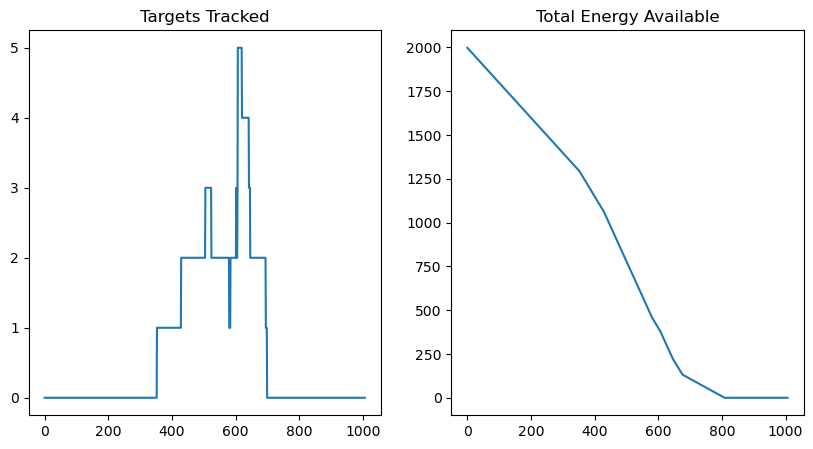

In [4]:
env_test.env_stats(plot=True);

The unique targets tracked:  [1. 2. 3. 4. 5.]
The number of unique targets tracked:  5


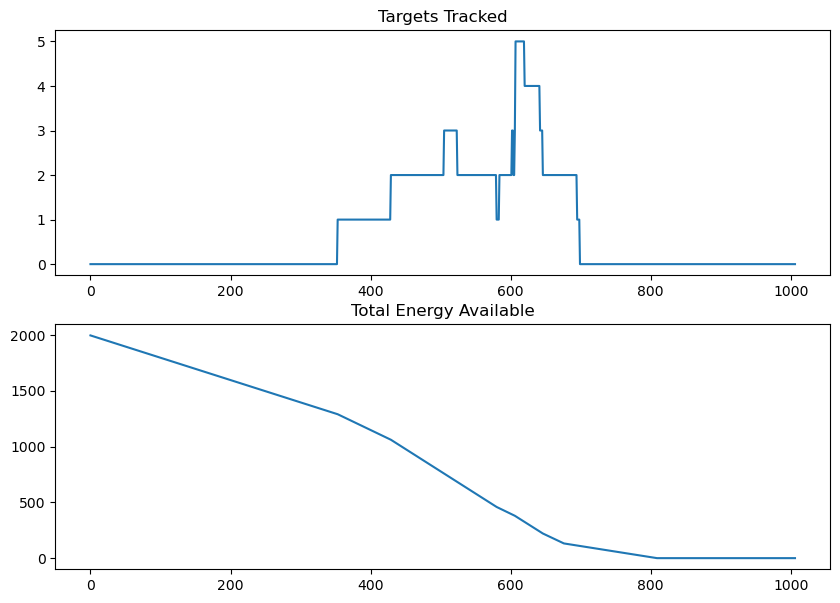

In [6]:
plot = True
# equalize the array sizes for processing
track_temp = np.zeros([len(env_test.tracked),len(max(env_test.tracked,key = lambda x: len(x)))])

for i,j in enumerate(env_test.tracked):
    track_temp[i][0:len(j)] = j

# show the number of targets tracked and their IDs
print('The unique targets tracked: ',np.unique(track_temp)[1:]) # excludes the zero used for padding the arrays.
print('The number of unique targets tracked: ', len(np.unique(track_temp))-1) # -1 so we dont count the zero

if plot:

    fig, (ax1, ax2) = plt.subplots(2, figsize=(10,7))
    #fig.suptitle('Vertically stacked subplots')
    ax1.plot(np.count_nonzero(track_temp, axis=1))
    ax1.set_title('Targets Tracked')
    ax2.plot(env_test.energy)
    ax2.set_title('Total Energy Available')


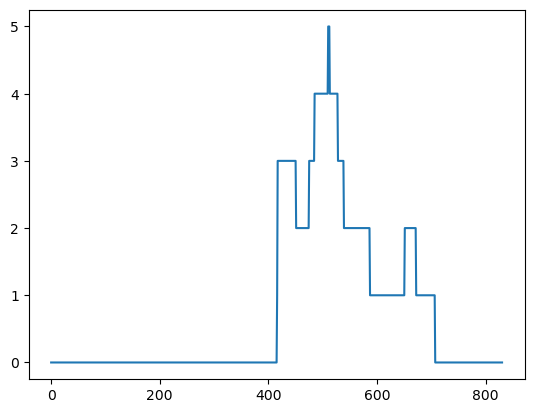

In [20]:
plt.plot(np.count_nonzero(temp, axis=1))

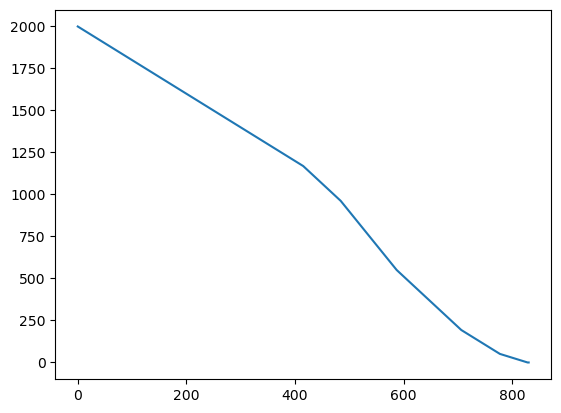

In [13]:
plt.plot(energy)